## Testing SciPy
This tests out the use of a multivariate normal distribution, since its what i want to use for the cross entropy method

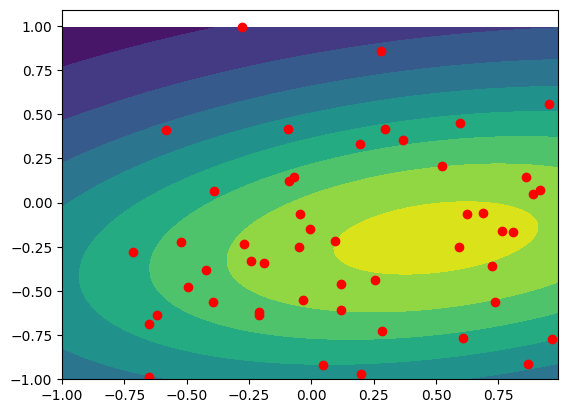

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# tutorial from scipy documentation
x, y = np.mgrid[-1:1:0.01, -1:1:0.01]
pos = np.dstack((x, y))
rv = sp.stats.multivariate_normal([0.5, -0.2], [[2.0, 0.3], [0.3, 0.5]])
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.contourf(x,y, rv.pdf(pos))

# lets try sampling from the MV distribution
# Bounds for the region in which to sample
lower_bound = [-1, -1]  # Lower bounds (xmin, ymin)
upper_bound = [1, 1]  # Upper bounds (xmax, ymax)

# Function to sample points within the bounds
def sample_within_bounds(dist, lower_bound, upper_bound, num_samples):
    samples = []
    while len(samples) < num_samples:
        # Sample from the multivariate normal distribution
        sample = dist.rvs()
        
        # Check if the sample is within the bounds
        if np.all(sample >= lower_bound) and np.all(sample <= upper_bound):
            samples.append(sample)
    
    return np.array(samples)

samples = sample_within_bounds(rv, lower_bound, upper_bound, 50)

ax1.plot(samples[:, 0], samples[:, 1], 'ro')

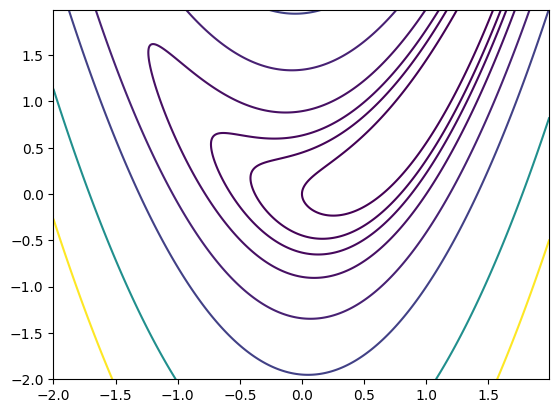

In [2]:
import matplotlib.pyplot as plt

def rosenbrock(x, y, a=1, b=5): 
    return (a-x)**2 + b*(y - x**2)**2

x, y = np.mgrid[-2:2:0.01, -2:2:0.01]
z = rosenbrock(x, y)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.contour(x,y,z, levels=[1,2,3,5,10,20,50,100])


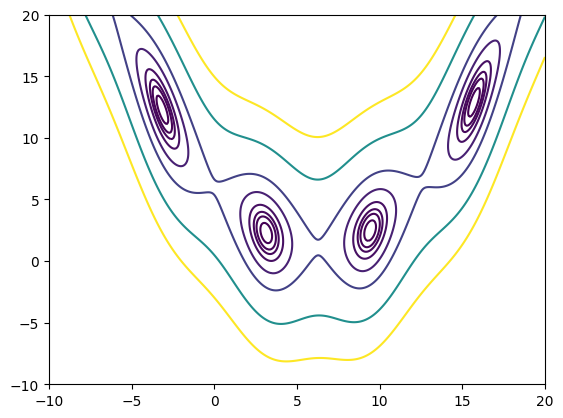

In [3]:
import matplotlib.pyplot as plt
from math import pi, cos

def branin(x, y, a=1, b=5.1/(4*pi**2), c=5/pi, r=6, s=10, t=1/(8*pi)):
    return a * (y - b * x**2 + c * x - r)**2 + s * (1 - t) * cos(x) + s
vectorized_branin = np.vectorize(branin)

x, y = np.meshgrid(np.linspace(-10, 20, 400), np.linspace(-10, 20, 400))
z = vectorized_branin(x, y)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.contour(x,y,z, levels=[1,2,3,5,10,20,50,100])

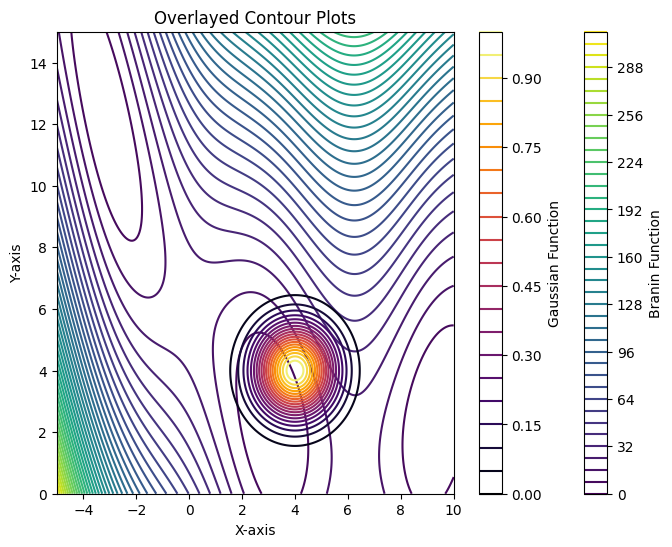

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos

# Branin function definition
def branin(x, y, a=1, b=5.1/(4*pi**2), c=5/pi, r=6, s=10, t=1/(8*pi)):
    return a * (y - b * x**2 + c * x - r)**2 + s * (1 - t) * cos(x) + s

# Vectorize the Branin function
vectorized_branin = np.vectorize(branin)

# Create mesh grids for x and y values
x, y = np.meshgrid(np.linspace(-5, 10, 400), np.linspace(0, 15, 400))  # Create a grid

# Compute Branin function values at each point
z = vectorized_branin(x, y)

# Generate a second function for overlay (for example, a Gaussian)
def gaussian(x, y, mu_x=4, mu_y=4, sigma_x=1, sigma_y=1):
    return np.exp(-((x - mu_x)**2 / (2 * sigma_x**2) + (y - mu_y)**2 / (2 * sigma_y**2)))

# Compute Gaussian function values at each point
z_gaussian = gaussian(x, y)

# Create a contour plot
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111)

# Plot the first contour (Branin function)
contour1 = ax1.contour(x, y, z, levels=40, cmap='viridis')  # Branin function

# Plot the second contour (Gaussian function)
contour2 = ax1.contour(x, y, z_gaussian, levels=20, cmap='inferno')  # Gaussian function

# Add color bars for both contour plots
fig1.colorbar(contour1, ax=ax1, orientation='vertical', label='Branin Function')
fig1.colorbar(contour2, ax=ax1, orientation='vertical', label='Gaussian Function')

# Add titles and labels
ax1.set_title("Overlayed Contour Plots")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")

# Display the plot
plt.show()

## Cross entropy
Now i will implement the **Fully Adaptive Cross Entropy** algorithm. 

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal

def FullyAdaptiveCrossEntropy(objFn, dist, maxIter, numSamples=100, numEliteSamples=10):
    for iter in range(maxIter):
        # Sample from the multivariate normal distribution
        samples = dist.rvs(size=numSamples)
        # sort samples by value of the objective function
        sortedIndices = np.argsort([objFn(x[0], x[1]) for x in samples])
        sortedSamples = samples[sortedIndices]

        # fit mutlivariate normal to best samples
        mean, cov = multivariate_normal.fit(sortedSamples[:numEliteSamples])
        dist = multivariate_normal(mean, cov)
    return mean, cov

mean = [-2.0, -0.2]
cov = [[5, 0.6], [0.6, 3.0]]
rv = multivariate_normal(mean, cov)

FullyAdaptiveCrossEntropy(branin, rv, 12)

(array([3.1415926 , 2.27500029]),
 array([[ 7.62839374e-14, -3.25745771e-14],
        [-3.25745771e-14,  8.41096398e-13]]))

This next block will make drawings of the process that the algorithm takes.

In [ ]:
from scipy.stats import multivariate_normal


def FullyAdaptiveCrossEntropyDraw(objFn, dist, maxIter, numSamples=100, numEliteSamples=10):
    arr_samples=[]
    arr_elite=[]
    arr_dist=[]
    for iter in range(maxIter):
        # Sample from the multivariate normal distribution
        samples = dist.rvs(size=numSamples)
        # sort samples by value of the objective function
        sortedIndices = np.argsort([objFn(x[0], x[1]) for x in samples])
        sortedSamples = samples[sortedIndices]

        # fit mutlivariate normal to best samples
        mean, cov = multivariate_normal.fit(sortedSamples[:numEliteSamples])
        dist = multivariate_normal(mean, cov)

        arr_samples.append(samples)
        arr_elite.append(sortedSamples[:numEliteSamples])
        arr_dist.append((mean, cov))
    return arr_samples, arr_elite, arr_dist

# starting values for the distribution
mean = [-2.0, -0.2]
cov = [[10, 0.6], [0.6, 10]]
rv = multivariate_normal(mean, cov)

# fig zero
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)

x, y = np.meshgrid(np.linspace(-10, 15, 400), np.linspace(-10, 15, 400))
pos = np.dstack((x, y))

z_branin = vectorized_branin(x, y)
ax.contourf(x,y,z_branin, levels=[0,1,2,3,5,10,20,50,100])
z_mv = rv.pdf(pos)
ax.contour(x,y,z_mv, levels=5, cmap='inferno')
ax.set_title(f"Plot 0")
plt.savefig(f"Plot 0.png")

# obtaining the data
samples, elite, dists = FullyAdaptiveCrossEntropyDraw(branin, rv, 15, 50)
dists.insert(0, (mean, cov))

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import random

def branin(x, y, a=1, b=5.1/(4*pi**2), c=5/pi, r=6, s=10, t=1/(8*pi)):
    return a * (y - b * x**2 + c * x - r)**2 + s * (1 - t) * cos(x) + s
vectorized_branin = np.vectorize(branin)

# select n random samples within the bounds 2D
def selectSamples(samples, n, lowerbounds, upperbounds):
    selection = []
    counter = 0
    while (len(selection) < n and counter < 100):
        counter = counter + 1
        candidate = random.choice(samples)
        if (candidate[0] > lowerbounds[0] and candidate[0] < upperbounds[0]):
            if (candidate[1] > lowerbounds[1] and candidate[1] < upperbounds[1]):
                selection.append(candidate)
    return np.array(selection)

for i in range(len(dists)-1):
    
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111)
    if(i<3):
        lowerbounds = [-5, -5]
        upperbounds = [10, 10] 
    elif (i >= 3):
        lowerbounds = [0, 0]
        upperbounds = [5, 5]
    
    x, y = np.meshgrid(np.linspace(lowerbounds[0], upperbounds[0], 400), np.linspace(lowerbounds[1], upperbounds[1], 400))
    pos = np.dstack((x, y))

    z_branin = vectorized_branin(x, y)
    ax.contourf(x,y,z_branin, levels=[0,1,2,3,5,10,20,50,100,200])
    
    rv = multivariate_normal(dists[i][0], dists[i][1])
    z_mv = rv.pdf(pos)
    ax.contour(x,y,z_mv, levels=[1e-3, 1e-2, 5e-2, 1e-1, 5e-1, 9e-1], colors='k')
    ax.set_title(f"Plot {i + 1}")

    # select samples to plot, cant plot everything
    select = selectSamples(samples[i], 20, lowerbounds, upperbounds)
    ax.plot(select[:, 0], select[:, 1], 'ko')
    # sometimes elite samples fall outside the bounds 
    elite_arr = selectSamples(elite[i], 8, lowerbounds, upperbounds)
    ax.plot(elite_arr[:, 0], elite_arr[:,1], 'ro')
#    plt.savefig(f"CEplots/Plot{i + 1}.png")


    

That concludes the figures for CE. In the future, do a simple comparison of how long it takes the algorithm to "converge" on a zero

## Covariance Matrix Adaptation - Evolutionary Strategy
Now i will implement the **CMA-ES** algorithm. Update: coudlnt do it in time. Will come back to implement. Issue is i dont know where the dot products are

In [15]:
from scipy.stats import multivariate_normal
from math import floor, log, exp, sqrt
import numpy as np
from numpy.linalg import norm, inv, eig

def CovarianceMatrixAdaptation(objFn, x, maxIter, stepSize=1.0, numSamples=None, numEliteSamples=None):
    if numSamples is None:
        numSamples = 4 + floor(3*log(len(x))) # population size
    if numEliteSamples is None:
        numEliteSamples = numSamples // 2

    # setting the selection parameters
    mu, n = x, len(x)
    ws = log((numSamples + 1) / 2) - np.log(np.array([x + 1 for x in range(numSamples)])) # recombination weights
    ws[0:numEliteSamples] = ws[0:numEliteSamples] / np.sum(ws[0:numEliteSamples]) # normalize recombination weights
    mu_eff = 1 / np.sum(ws[0:numEliteSamples] ** 2) # variance effective size of mu

    # covariance matrix adaptation parameters
    stepsize_const = (mu_eff + 2)/(n + mu_eff + 5) # constant for step size control
    stepsize_damp = 1 + 2 * max(0, np.sqrt(mu_eff - 1) / (n + 1) - 1) + stepsize_const # damping for step size
    cov_cum_const = (4 + mu_eff/n)/(n + 4 + 2*mu_eff/n) # covariance cumulation constant
    r1_const = 2/((n+1.3)**2 + mu_eff) # learning rate for rank one update of cov
    rmu_const  = min(1 - r1_const, 2*(mu_eff - 2 + 1 / mu_eff)/((n+2)**2 + mu_eff)) # learning rate for rank mu update of cov

    # some selection parameter
    ws[numEliteSamples:] = ws[numEliteSamples:] * -(1 + r1_const/rmu_const) / np.sum(ws[numEliteSamples:]) # normalize recombination weights

    # expectation of normal distribution
    E = n**0.5 * (1 - 1 / (4 * n) + 1 / (21 * n**2))

    # variables
    stepsize_cum, cov_cum, cov = np.zeros(n), np.zeros(n), np.eye(n)
    for k in range(maxIter):
        print(k)
        dist = multivariate_normal(mu, stepSize**2 * cov)
        samples = dist.rvs(size=numSamples)
        samples_val = np.array([objFn(x[0], x[1]) for x in samples]) # this function would break if dimension is higher than 2
        samples_sorted_idx = np.argsort(samples_val)

        # selection and mean update
        sample_delta = np.array([(x - mu)/stepSize for x in samples])
        weight_delta = sum(ws[i]*sample_delta[samples_sorted_idx[i]] for i in range(numEliteSamples))      
        mu = mu + stepSize * weight_delta

        # step size control
        #C = matrix_power(cov,-0.5) per the textbook using eigenvalue decomposition the matrix inverse square root can be obtained
        eigvals, eigvecs = eig(cov)
        C = np.dot(eigvecs, np.dot(inv(np.diag(eigvals)), inv(eigvecs))) # this is cov^(-0.5) = BD^-1B

        stepsize_cum = (1-stepsize_const)*stepsize_cum + sqrt(stepsize_const*(2-stepsize_const)*mu_eff)*C*weight_delta
        stepSize = stepSize * exp(stepsize_const/stepsize_damp * (norm(stepsize_cum)/E - 1))

        # covariance adaptation
        stepsize_stall = int(norm(stepsize_cum)/sqrt(1-(1-stepsize_const)**(2*k)) < (1.4+ 2/(n+1))*E) # stepsize stall control 1 or 0
        cov_cum = (1-cov_cum_const)*cov_cum + stepsize_stall*sqrt(cov_cum_const*(2-cov_cum_const) * mu_eff)*weight_delta
        weight_adj = np.array([ws[i] if ws[i]>=0 else n*ws[i]/norm(C*sample_delta[samples_sorted_idx[i]])**2 for i in range(numSamples)])    # adjusted weights

        cov = (1-r1_const-rmu_const) * cov + r1_const*(cov_cum*np.transpose(cov_cum) + \
                (1-stepsize_stall) * cov_cum_const*(2-cov_cum_const) * cov) + \
                rmu_const* sum(weight_adj[i]*sample_delta[samples_sorted_idx[i]] * np.transpose(sample_delta[samples_sorted_idx[i]]) for i in range(numSamples))
        cov = np.triu(cov)+ np.transpose(np.triu(cov,1))
    
    return mu

CovarianceMatrixAdaptation(branin, [-2.0, -0.2], 12)

0
1
2
3
4
5
6
7
8
9
10
11


/tmp/ipykernel_285458/1319018787.py:54: RuntimeWarning: divide by zero encountered in scalar divide
  stepsize_stall = int(norm(stepsize_cum)/sqrt(1-(1-stepsize_const)**(2*k)) < (1.4+ 2/(n+1))*E) # stepsize stall control 1 or 0


array([7.00390744, 0.89290169])

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=291129, Tue Apr  8 22:54:59 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 4.759430128089157e+01 1.0e+00 1.39e+00  1e+00  2e+00 0:00.0
    2     12 2.371259497196095e+01 1.2e+00 1.89e+00  2e+00  2e+00 0:00.1


    3     18 2.727435495789861e+01 1.2e+00 1.75e+00  1e+00  2e+00 0:00.3
   83    498 3.978873577297382e-01 2.2e+00 2.74e-05  2e-08  2e-08 0:01.4


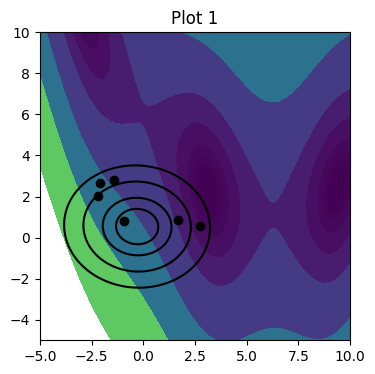

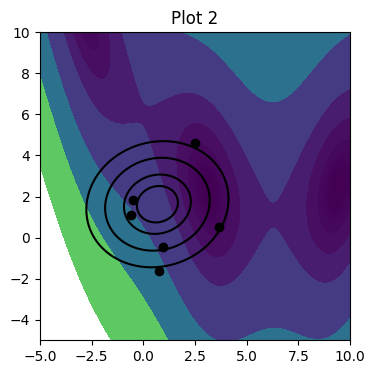

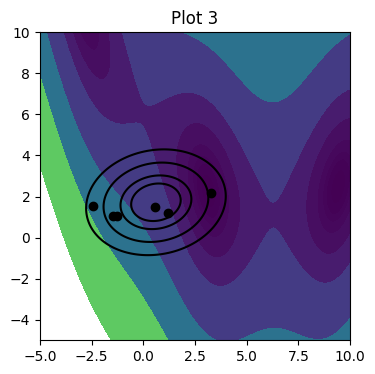

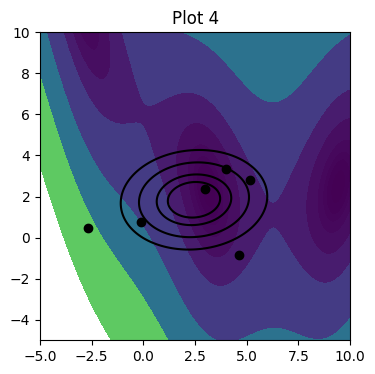

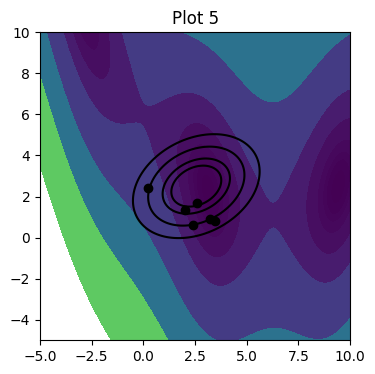

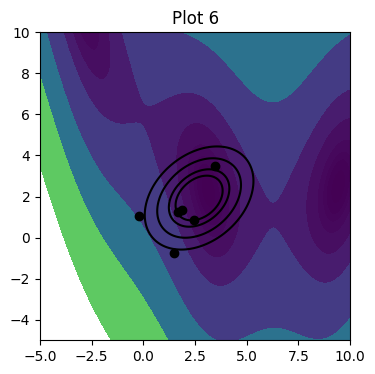

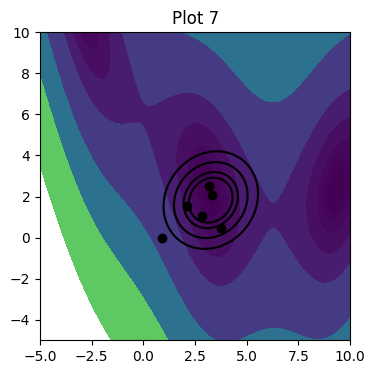

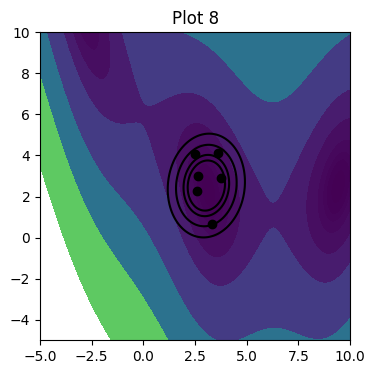

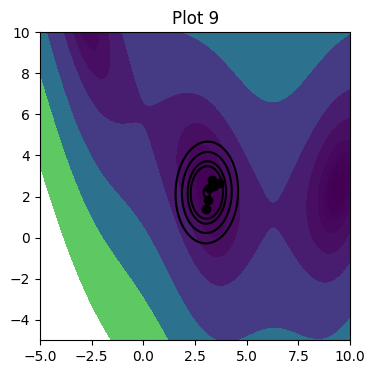

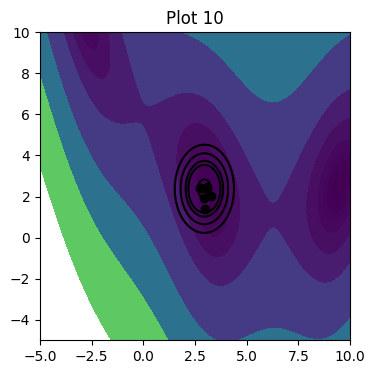

In [54]:
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from numpy import pi, cos
import cma

def branin(x, a=1, b=5.1/(4*pi**2), c=5/pi, r=6, s=10, t=1/(8*pi)):
    y = x[1]
    x = x[0]
    return a * (y - b * x**2 + c * x - r)**2 + s * (1 - t) * cos(x) + s

x0 = [-2.0, -0.2]

es = cma.CMAEvolutionStrategy(x0, 1, {'seed':291129}) # took this snippet to get the output form the FAQ on the github for cma

i = 0
while not es.stop():
    es.optimize(branin, iterations=1)
    mean = es.mean  # mean
    cov = es.sm.C  # covariance matrix without es.sigma and es.sigma_vec.scaling
    
    if (i % 1 == 0 and i < 10):
        fig = plt.figure(figsize=(4, 4))
        ax = fig.add_subplot(111)
        if(i<6):
            lowerbounds = [-5, -5]
            upperbounds = [10, 10] 
        elif (i >= 14):
            lowerbounds = [0, 0]
            upperbounds = [5, 5]
        
        x, y = np.meshgrid(np.linspace(lowerbounds[0], upperbounds[0], 400), np.linspace(lowerbounds[1], upperbounds[1], 400))
        pos = np.dstack((x, y))

        z_branin = branin([x, y])
        ax.contourf(x,y,z_branin, levels=[0,1,2,3,5,10,20,50,100,200])
        
        rv = multivariate_normal(mean, cov)
        z_mv = rv.pdf(pos)
        ax.contour(x,y,z_mv, levels=[1e-3, 1e-2, 5e-2, 1e-1, 5e-1, 9e-1], colors='k')
        ax.set_title(f"Plot {i + 1}")

        # select samples to plot, cant plot everything
        select = np.array(es.ask())
        ax.plot(select[:, 0], select[:, 1], 'ko')
        # sometimes elite samples fall outside the bounds 
        #elite_arr = selectSamples(elite[i], 8, lowerbounds, upperbounds)
        #ax.plot(elite_arr[:, 0], elite_arr[:,1], 'ro')
        plt.savefig(f"CMAplots/Plot{i + 1}.png")
    i=i+1



Text(0.5, 1.0, 'Plot 0')

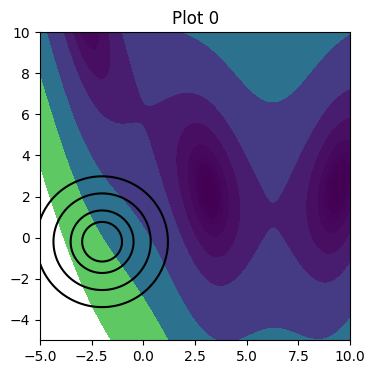

In [57]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)
lowerbounds = [-5, -5]
upperbounds = [10, 10] 

x, y = np.meshgrid(np.linspace(lowerbounds[0], upperbounds[0], 400), np.linspace(lowerbounds[1], upperbounds[1], 400))
pos = np.dstack((x, y))

z_branin = branin([x, y])
ax.contourf(x,y,z_branin, levels=[0,1,2,3,5,10,20,50,100,200])

rv = multivariate_normal([-2.0, -0.2], [[1.0, 0.0], [0.0, 1.0]])
z_mv = rv.pdf(pos)
ax.contour(x,y,z_mv, levels=[1e-3, 1e-2, 5e-2, 1e-1, 5e-1, 9e-1], colors='k')
ax.set_title(f"Plot {0}")